In [2]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from glob import glob 
import cv2
import numpy as np
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(64,64))
    image = image/255.0
    return image

In [10]:
paths = glob("../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/*/*")
images = []
labels = []
for i in paths:
    label = i.split("/")[-2]
    if labels.count(label) <= 600:
        image = cv2.imread(i)
        image = preprocess(image)
        images.append(image)
        labels.append(label)
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
images = np.array(images)
labels = np.array(labels)

In [11]:
def plotResults(results):
    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Acc')
    plt.plot(val_acc, label='Validation Acc')
    plt.title('Training And Validation Acc')
    plt.legend(loc='lower right')
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training And Validation Loss')
    plt.legend()
    plt.show()

def split_datasets(X,Y,validation=False):
    x_train,x_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.2)
    if validation:
        x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5)
        return x_train,x_val,x_test,y_train,y_val,y_test
    else:
        return x_train,x_temp,y_train,y_temp

In [12]:
x_train,x_val,x_test,y_train,y_val,y_test = split_datasets(images,labels,True)

In [13]:
lr = 0.01
def learning_rate(epoch):
    global lr
    if epoch>8:
        return lr*.1
    else:
        return lr
x_train = x_train.reshape(-1, 64,64, 1)
x_val = x_val.reshape(-1, 64,64, 1)
x_test = x_test.reshape(-1, 64,64, 1)
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu',input_shape=(64,64,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(29, activation='softmax'))
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
results = model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7)
                                                                                        ,tf.keras.callbacks.LearningRateScheduler(learning_rate)])

Epoch 1/50
436/436 [==============================] - 4s 8ms/step - loss: 3.3665 - accuracy: 0.0701 - val_loss: 4.1511 - val_accuracy: 0.0786
Epoch 2/50
436/436 [==============================] - 4s 8ms/step - loss: 3.0185 - accuracy: 0.1187 - val_loss: 7.8517 - val_accuracy: 0.1142
Epoch 3/50
436/436 [==============================] - 3s 7ms/step - loss: 2.6768 - accuracy: 0.1871 - val_loss: 2.2110 - val_accuracy: 0.3201
Epoch 4/50
436/436 [==============================] - 3s 7ms/step - loss: 2.2222 - accuracy: 0.2996 - val_loss: 2.4021 - val_accuracy: 0.3649
Epoch 5/50
436/436 [==============================] - 3s 7ms/step - loss: 1.7859 - accuracy: 0.4226 - val_loss: 1.4715 - val_accuracy: 0.5066
Epoch 6/50
436/436 [==============================] - 3s 8ms/step - loss: 1.4278 - accuracy: 0.5318 - val_loss: 1.6071 - val_accuracy: 0.5410
Epoch 7/50
436/436 [==============================] - 3s 7ms/step - loss: 1.1491 - accuracy: 0.6242 - val_loss: 0.9017 - val_accuracy: 0.6885
Epoch 

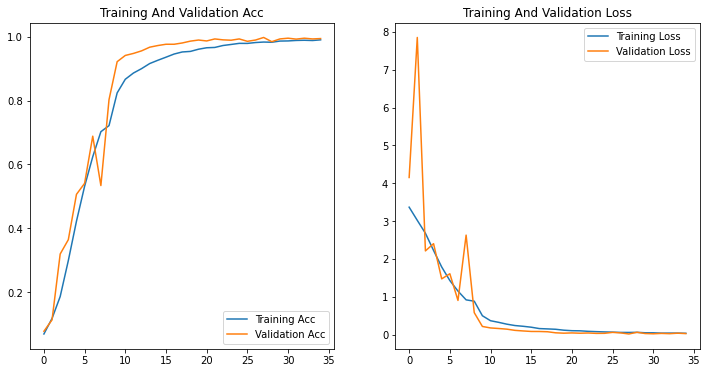

In [15]:
plotResults(results)

In [16]:
try:
    test_results = model.test_on_batch(x_test,y_test)
    print(test_results)
except:
    print("Memory Error")

[0.03867403417825699, 0.9913941621780396]


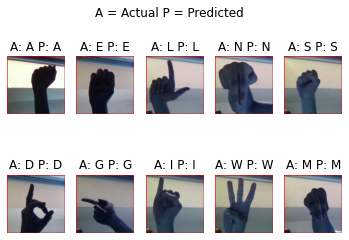

In [31]:
dct = {0:"A",1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",
        7:"H",8:"I",9:"J",10:"K",11:"L",12:"M",13:"N",
        14:"O",15:"P",16:"Q",17:"R",18:"S",19:"T",20:"U",
        21:"V",22:"W",23:"X",24:"Y",25:"Z",26:"Delete",27:"Nothing",
        28:"Space"}

paths = glob("../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/*")
for i in range(10):
    image = cv2.imread(paths[i])
    img_processed = preprocess(image)   
    img_processed = img_processed.reshape(-1, 64,64, 1)
    pred = model.predict(img_processed)
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.title(f"A: {paths[i].split('/')[-1][0]} P: {dct[pred.argmax()]}")
    plt.suptitle("A = Actual P = Predicted")
    plt.axis("off")
plt.show()